In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Build a simple neural network model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [4]:
# Function to find the optimal learning rate range
def lr_finder(model, x_train, y_train, min_lr=1e-6, max_lr=1e-1, steps=100):
    lrs = np.logspace(np.log10(min_lr), np.log10(max_lr), num=steps)
    losses = []

    for lr in lrs:
        # Compile the model with a new learning rate
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy')

        # Train for just one batch
        history = model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=0)

        # Record the loss
        loss = history.history['loss'][0]
        losses.append(loss)

    return lrs, losses

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


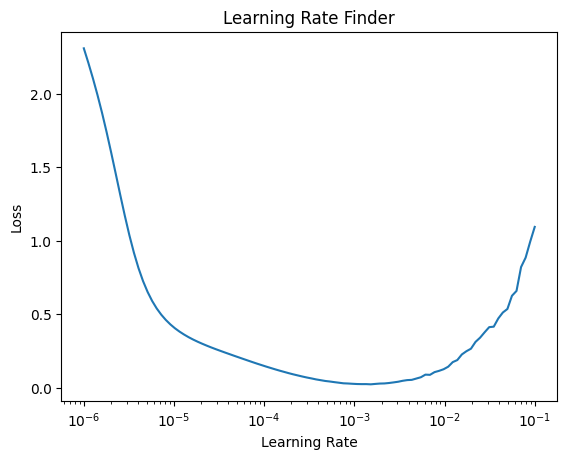

In [5]:
# Run the learning rate finder
model = build_model()
lrs, losses = lr_finder(model, x_train, y_train)

# Plot the results to visualize the optimal learning rate range
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Finder')
plt.show()

In [6]:
# Select optimal learning rate range based on the plot
# You should choose the learning rate where the loss starts decreasing rapidly,
# usually just before the loss starts increasing again.
optimal_lr = lrs[np.argmin(losses)]

# Learning Rate Scheduler: Exponential Decay
initial_lr = optimal_lr  # Use the best learning rate found
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

In [7]:
# Rebuild and compile the model using the learning rate scheduler
model = build_model()
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the learning rate scheduler
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8851 - loss: 0.3870 - val_accuracy: 0.9668 - val_loss: 0.1172
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1095 - val_accuracy: 0.9654 - val_loss: 0.1132
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9724 - val_loss: 0.0829
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0499 - val_accuracy: 0.9786 - val_loss: 0.0768
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 0.9748 - val_loss: 0.0884
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9771 - val_loss: 0.0789
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9792 - val_loss: 0.0791
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9939 - loss: 0